In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data_darah_2015_2025_edited.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['State'] = df['State'].astype('category').cat.codes


C:\Users\USER\AppData\Local\Temp\ipykernel_25316\843256154.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Define features
features = [
    'State', 'Month', 'Day', 'Weekday',
    'Location_centre', 'Location_mobile',
    'Type_wholeblood', 'Type_apheresis_platelet', 'Type_apheresis_plasma', 'Type_other',
    'Social_civilian', 'Social_student', 'Social_policearmy',
    'Donations_new', 'Donations_regular', 'Donations_irregular'
]
X = df[features]
y_a = df['Blood_a']
y_b = df['Blood_b']
y_o = df['Blood_o']
y_ab = df['Blood_ab']

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

# Blood A
X_train, X_test, y_train, y_test = train_test_split(X, y_a, test_size=0.2, random_state=42)
model_a = RandomForestRegressor(n_estimators=100, random_state=42)
model_a.fit(X_train, y_train)

# Evaluate
y_pred = model_a.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 16.711939167784966
R2 Score: 0.9837020127121258


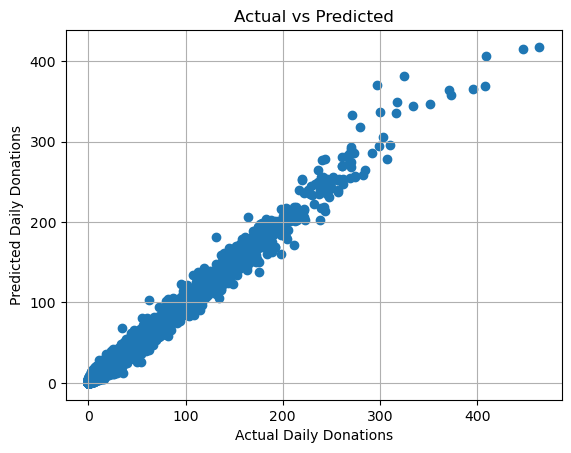

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Daily Donations")
plt.ylabel("Predicted Daily Donations")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
#Save Model
joblib.dump(model_a, 'model_blood_a.pkl')

# Repeat for B, O, AB
model_b = RandomForestRegressor().fit(X, y_b)
joblib.dump(model_b, 'model_blood_b.pkl')

model_o = RandomForestRegressor().fit(X, y_o)
joblib.dump(model_o, 'model_blood_o.pkl')

model_ab = RandomForestRegressor().fit(X, y_ab)
joblib.dump(model_ab, 'model_blood_ab.pkl')
